# LAB 2: INTRO ML

Laboratorio 2: Armado de un esquema de aprendizaje automático
En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en ./data/loan_data.csv. Si abren el archivo verán que al principio (las líneas que empiezan con #) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por scikit-learn.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

Carga de datos y división en entrenamiento y evaluación
La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [66]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [68]:
dataset.shape

(1854, 11)

In [69]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


Attributes
==========
* Name    Description
* TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
* LOAN    Amount of the loan request
* MORTDUE Amount due on existing mortgage
* VALUE   Value of current property
* YOJ     Years at present job
* DEROG   Number of major derogatory reports
* DELINQ  Number of delinquent credit lines
* CLAGE   Age of oldest trade line in months
* NINQ    Number of recent credit lines
* CLNO    Number of credit lines
* DEBTINC Debt-to-income ratio

In [70]:
group = dataset.groupby("TARGET")
print(group.mean())

                LOAN       MORTDUE          VALUE       YOJ     DEROG  \
TARGET                                                                  
0       19319.546926  76798.117799  108209.451133  9.166990  0.099029   
1       18072.815534  73905.721683  102879.275081  7.566343  0.631068   

          DELINQ       CLAGE      NINQ       CLNO    DEBTINC  
TARGET                                                        
0       0.187702  186.318629  1.025890  21.750162  33.463484  
1       0.980583  150.211552  1.644013  22.391586  40.123029  


## Ejercicio 1: Descripción de los Datos y la Tarea
Responder las siguientes preguntas:

1- ¿De qué se trata el conjunto de datos?
2- ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3- ¿Qué información (atributos) hay disponible para hacer la predicción?
4- ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Respuestas:

1- El conjunto de datos se trata de informacion que analizan los bancos a la hora de brindar prestamos financieros. El modelo se alimentara de datos recientemente obtenidos a partir de los prestamos brindados.

2- La variable objetivo a predecir es "TARGET". La cual es una variable binaria, 1 indica que el prestamo no se pago mientras que 0 indica que se abono efectivamente.

3- El resto de atributos para predecir la variable target son:

LOAN    Importe del prestamo solicitado
MORTDUE Monto adeudado sobre hipoteca existente
VALUE   Valor de la propiedad actual
YOJ     Años en el trabajo actual
DEROG   Numero de reportes derogados
DELINQ  Número de líneas de crédito morosas
CLAGE   Antigüedad de la línea de credito más antigua en meses
NINQ    Numero de lineas de credito reciente
CLNO    Numero de lineas de credito
DEBTINC Ratio de deuda sobre ingresos. (Debt / Income).

4- Atributos que entendemos mas importante para la prediccion son: LOAN, DELINQ, MORTDUE Y DEBTINC

## Ejercicio 2: Predicción con Modelos Lineales
En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

1- Features de variables. Cuales son las variables que agregan mas valor al modelo?

Text(0, 0.5, 'TARGET')

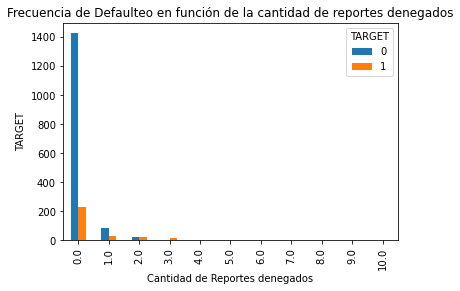

In [71]:
%matplotlib inline
pd.crosstab(dataset.DEROG, dataset.TARGET).plot(kind="bar")
plt.title("Frecuencia de Defaulteo en función de la cantidad de reportes denegados")
plt.xlabel("Cantidad de Reportes denegados")
plt.ylabel("TARGET")

### En principio, parece haber una relacion que mientras menor cantidad de reportes de credito rechazada tenga la persona, mayor probabilidad tiene de pagar el prestamo. 

<Figure size 1440x1440 with 0 Axes>

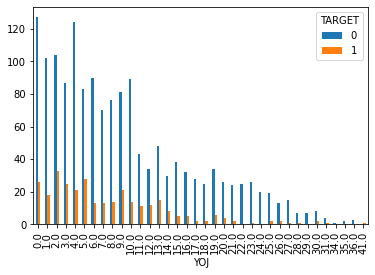

In [72]:
%matplotlib inline
plt.figure(figsize = (20,20))
pd.crosstab(dataset.YOJ, dataset.TARGET).plot(kind="bar")
plt.show()

## Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto
Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente fijar la semilla aleatoria para hacer repetible el experimento.

Evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [74]:
clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=0)) #parametro hinge por defecto (SVM)
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [75]:
parameters = clf.get_params
parameters

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])>

In [76]:
print("The accuracy of the train model is: ", clf.score(X_train, y_train))
print("The accuracy of the test model is: ", clf.score(X_test, y_test))

The accuracy of the train model is:  0.8732299393122049
The accuracy of the test model is:  0.8679245283018868


In [77]:
clf2 = make_pipeline(StandardScaler(), SGDClassifier(loss = 'log_loss',random_state=0)) #parametro log_loss:(Log Clasiffier)
clf2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(loss='log_loss', random_state=0))])

In [78]:
print("The accuracy of the train model is: ", clf2.score(X_train, y_train))
print("The accuracy of the test model is: ", clf2.score(X_test, y_test))

The accuracy of the train model is:  0.8718813216453135
The accuracy of the test model is:  0.8706199460916442


Se puede observar que la eficacia del modelo aumenta ligeramente con una regresion logistica que con un SVM linear model (para el test).

In [79]:
# Para la determinacion de las metricas utilizaremos el modelo logistico (clf2)

threshold = 0.5

In [80]:
probs = clf2.predict_proba(X_train)
#probs.shape

In [81]:
X_train.shape

(1483, 10)

In [82]:
predictions = clf2.predict(X_train)
predictions.shape

(1483,)

In [83]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.196910,0
1,0.218859,0
2,0.355735,0
3,0.049944,0
4,0.032432,0


In [84]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,1358
1,125


In [85]:
prob_df["predict2"] = list(predictions)
prob_df["control"] = (prob_df.predict2 == prob_df.prediction)
prob_df["control"].value_counts() #mismo resultado que obtendriamos con el metodo predict de sklearn

True    1483
Name: control, dtype: int64

Nuestro modelo, segun una funcion sigmoide, clasifica a 1358 como 0 (paga la deuda) y 125 casos como 1 (entra en deault)

# METRICAS
    Con el conjunto de validacion.

## Precision, Recall y F1

In [86]:
y_pred = clf2.predict(X_test)

In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [88]:
precision_score(y_test, y_pred)

0.6923076923076923

In [89]:
recall_score(y_test, y_pred)

0.3103448275862069

In [90]:
f1_score(y_test, y_pred)

0.4285714285714286

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       313
           1       0.69      0.31      0.43        58

    accuracy                           0.87       371
   macro avg       0.79      0.64      0.68       371
weighted avg       0.85      0.87      0.85       371



In [92]:
thresholds = [0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.8, 0.9]

In [93]:
for t in thresholds:
    y_predict = clf2.predict_proba(X_test)[:,1]
    prediction = np.where(y_predict>t, 1, 0)
    print("Reporte de metricas para un threshold = " + str(t) + "\n\n", classification_report(y_test, prediction))
    

Reporte de metricas para un threshold = 0.1

               precision    recall  f1-score   support

           0       0.94      0.64      0.76       313
           1       0.28      0.78      0.41        58

    accuracy                           0.66       371
   macro avg       0.61      0.71      0.59       371
weighted avg       0.84      0.66      0.70       371

Reporte de metricas para un threshold = 0.2

               precision    recall  f1-score   support

           0       0.92      0.82      0.87       313
           1       0.39      0.60      0.47        58

    accuracy                           0.79       371
   macro avg       0.65      0.71      0.67       371
weighted avg       0.84      0.79      0.81       371

Reporte de metricas para un threshold = 0.3

               precision    recall  f1-score   support

           0       0.90      0.91      0.90       313
           1       0.48      0.45      0.46        58

    accuracy                           0.84 

### Matrices de confusion

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confMatrix = confusion_matrix(y_test, y_pred, labels = [0,1])
print(confMatrix)

[[305   8]
 [ 40  18]]


In [96]:
tn, fp, fn, tp = confMatrix.ravel()
print(tn, fp, fn, tp)

305 8 40 18


In [97]:
for t in thresholds:
    y_predict = clf2.predict_proba(X_test)[:,1]
    prediction = np.where(y_predict>t, 1, 0)
    confMatrix = confusion_matrix(y_test, prediction, labels = [0,1])
    tn, fp, fn, tp = confMatrix.ravel()
    print("Matriz de confusion para un threshold = " + str(t) + "\n\n", confMatrix)
    print("Cantidad de True Positives: {}".format(tp))
    print("Cantidad de True Negatives: {}".format(tn))
    print("Cantidad de False Positives: {}".format(fp))
    print("Cantidad de False Negatives: {}".format(fn) + "\n\n") 

Matriz de confusion para un threshold = 0.1

 [[199 114]
 [ 13  45]]
Cantidad de True Positives: 45
Cantidad de True Negatives: 199
Cantidad de False Positives: 114
Cantidad de False Negatives: 13


Matriz de confusion para un threshold = 0.2

 [[258  55]
 [ 23  35]]
Cantidad de True Positives: 35
Cantidad de True Negatives: 258
Cantidad de False Positives: 55
Cantidad de False Negatives: 23


Matriz de confusion para un threshold = 0.3

 [[285  28]
 [ 32  26]]
Cantidad de True Positives: 26
Cantidad de True Negatives: 285
Cantidad de False Positives: 28
Cantidad de False Negatives: 32


Matriz de confusion para un threshold = 0.35

 [[295  18]
 [ 37  21]]
Cantidad de True Positives: 21
Cantidad de True Negatives: 295
Cantidad de False Positives: 18
Cantidad de False Negatives: 37


Matriz de confusion para un threshold = 0.4

 [[299  14]
 [ 38  20]]
Cantidad de True Positives: 20
Cantidad de True Negatives: 299
Cantidad de False Positives: 14
Cantidad de False Negatives: 38


Matriz d

In [98]:
# from utils import plot_confusion_matrix

# plot_confusion_matrix(confMatrix, [0, 1])

### Conclusiones:
* Con el reporte de metricas se puede observar que el threshold que marca la mejor precision es el del 0.90
* Analizando el mismo threshold (90%) la precision para predecir casos positivos, en este caso de clientes que no van a abonar su deuda, es perfecto (precision = 1) 
* El analisis descripto en el punto anterior se puede observar con mejor calidad en la matriz de confusion. La cual arroja un resultado como false positive = 0. 

## Ejercicio 2.2: Ajuste de Hiperparámetros
Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

* Accuracy
* Precision
* Recall
* F1
* matriz de confusión

In [99]:
from scipy.stats import loguniform

In [100]:
parameters = {'loss': ['hinge', 'log_loss'],
              'alpha': loguniform(1e-4, 1e2),
              'penalty': ['l1', 'l2']  
}

Busqueda del mejor modelo con Randomized Search de Sk Learn. El metodo por default usa un cross validation con cv = 5

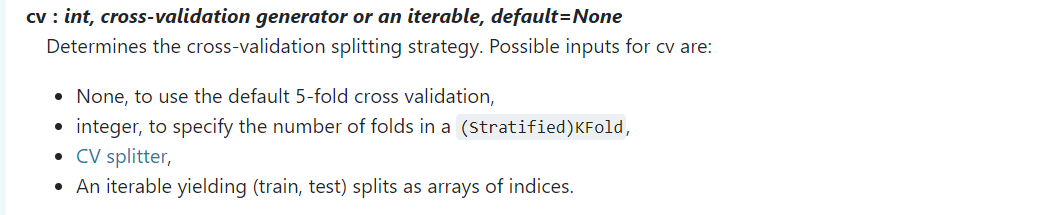

In [160]:
from sklearn.model_selection import RandomizedSearchCV

model = SGDClassifier(random_state=0)

cv = RandomizedSearchCV(model, parameters,n_iter = 100, random_state=0)
cv.fit(X, y);

C:\Users\Lenovo\.conda\envs\Python 2021\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\Python 2021\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\Python 2021\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\Python 2021\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [161]:
results = cv.cv_results_

In [162]:
results_df = pd.DataFrame(results)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045813,0.059274,0.000797,0.000976,0.196282,log_loss,l1,"{'alpha': 0.196282248134428, 'loss': 'log_loss...",0.830189,0.832884,0.711590,0.832884,0.835135,0.808536,0.048498,35
1,0.012497,0.011690,0.003124,0.006249,0.4136,log_loss,l2,"{'alpha': 0.4135997393839892, 'loss': 'log_los...",0.822102,0.832884,0.167116,0.805930,0.835135,0.692633,0.262962,77
2,0.024994,0.012497,0.000000,0.000000,0.034828,log_loss,l1,"{'alpha': 0.03482802087028331, 'loss': 'log_lo...",0.827493,0.832884,0.832884,0.665768,0.835135,0.798833,0.066580,42
3,0.009373,0.007653,0.003124,0.006249,0.04222,hinge,l1,"{'alpha': 0.042220489831498266, 'loss': 'hinge...",0.819407,0.832884,0.832884,0.832884,0.835135,0.830639,0.005683,20
4,0.006248,0.007653,0.000000,0.000000,60.530821,hinge,l2,"{'alpha': 60.530820800790195, 'loss': 'hinge',...",0.822102,0.832884,0.832884,0.735849,0.835135,0.811771,0.038232,32


In [104]:
excel = results_df.to_excel(r"C:\Users\franc\OneDrive\Escritorio\TECME\resultados del modelo.xlsx")

In [163]:
print('El mejor estimador para el modelo es: {}'.format(cv.best_estimator_))
print('Los parametros para el modelo son: {}'.format(cv.best_params_))

El mejor estimador para el modelo es: SGDClassifier(alpha=0.000266818752423705, loss='log_loss', penalty='l1',
              random_state=0)
Los parametros para el modelo son: {'alpha': 0.000266818752423705, 'loss': 'log_loss', 'penalty': 'l1'}


Resumen con las caracteristicas del mejor modelo:


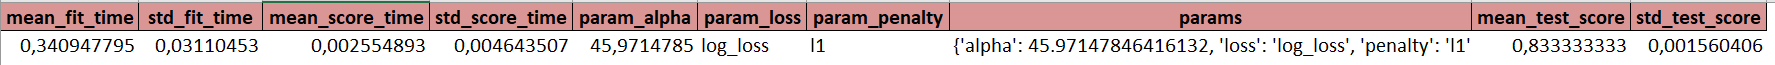

In [166]:
best_model = make_pipeline(StandardScaler(), SGDClassifier(loss = 'log_loss', alpha = 0.000266818752423705, penalty =  'l1', random_state=0, max_iter=1000)) #parametro log_loss:(Log Clasiffier)
best_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.000266818752423705, loss='log_loss',
                               penalty='l1', random_state=0))])

In [167]:
for t in thresholds:
    y_predict = best_model.predict_proba(X_test)[:,1]
    prediction = np.where(y_predict>t, 1, 0)
    print("Reporte de metricas para un threshold = " + str(t) + "\n\n", classification_report(y_test, prediction))

Reporte de metricas para un threshold = 0.1

               precision    recall  f1-score   support

           0       0.95      0.46      0.62       313
           1       0.23      0.86      0.36        58

    accuracy                           0.52       371
   macro avg       0.59      0.66      0.49       371
weighted avg       0.83      0.52      0.58       371

Reporte de metricas para un threshold = 0.2

               precision    recall  f1-score   support

           0       0.95      0.73      0.83       313
           1       0.35      0.78      0.48        58

    accuracy                           0.74       371
   macro avg       0.65      0.75      0.65       371
weighted avg       0.85      0.74      0.77       371

Reporte de metricas para un threshold = 0.3

               precision    recall  f1-score   support

           0       0.93      0.86      0.89       313
           1       0.46      0.64      0.54        58

    accuracy                           0.83 

In [168]:
y_predicted = best_model.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
for t in thresholds:
    y_predict = best_model.predict_proba(X_test)[:,1]
    prediction = np.where(y_predict>t, 1, 0)
    confMatrix = confusion_matrix(y_test, prediction, labels = [0,1])
    tn, fp, fn, tp = confMatrix.ravel()
    print("Matriz de confusion para un threshold = " + str(t) + "\n\n", confMatrix)
    print("Cantidad de True Positives: {}".format(tp))
    print("Cantidad de True Negatives: {}".format(tn))
    print("Cantidad de False Positives: {}".format(fp))
    print("Cantidad de False Negatives: {}".format(fn) + "\n\n") 

Matriz de confusion para un threshold = 0.1

 [[143 170]
 [  8  50]]
Cantidad de True Positives: 50
Cantidad de True Negatives: 143
Cantidad de False Positives: 170
Cantidad de False Negatives: 8


Matriz de confusion para un threshold = 0.2

 [[229  84]
 [ 13  45]]
Cantidad de True Positives: 45
Cantidad de True Negatives: 229
Cantidad de False Positives: 84
Cantidad de False Negatives: 13


Matriz de confusion para un threshold = 0.3

 [[270  43]
 [ 21  37]]
Cantidad de True Positives: 37
Cantidad de True Negatives: 270
Cantidad de False Positives: 43
Cantidad de False Negatives: 21


Matriz de confusion para un threshold = 0.35

 [[293  20]
 [ 24  34]]
Cantidad de True Positives: 34
Cantidad de True Negatives: 293
Cantidad de False Positives: 20
Cantidad de False Negatives: 24


Matriz de confusion para un threshold = 0.4

 [[300  13]
 [ 32  26]]
Cantidad de True Positives: 26
Cantidad de True Negatives: 300
Cantidad de False Positives: 13
Cantidad de False Negatives: 32


Matriz de